# **Orbital Intelligence Report: Strategic Global Synthesis**
**Project:** Orbital Clutter: Mapping the Kessler Acceleration  
**Phase:** 4.0 (Final Wargame Analysis)  
**Dataset:** `kinetic_master.csv` (The Gold Standard Registry)  
**Analyst:** James Glosser  

---

### **The Objective: Proving the Kessler Acceleration**
We have successfully fused the physical tracking data (SATCAT) with operational intelligence (UCS) to create a unified "Kinetic Master" registry. Now, we move from engineering to **Strategic Analysis**.

This notebook tests the core hypothesis of the project: **"The Kessler Acceleration."**

We are looking for evidence that the orbital environment has decoupled from historical linear growth and entered a self-sustaining exponential risk phase. We will quantify this through five strategic dimensions:

1.  **The Double Threat:** Comparing the "Visible" population (Count) against the "Kinetic" reality (Mass).
2.  **The 2014 Pivot:** Identifying the exact moment commercial launch cadence broke the historical trendline.
3.  **The Kessler Canyon:** A high-resolution density mapping of Kinetic Energy ($E_k$) vs. Altitude to visualize the "Deadly Ring."
4.  **Geopolitical Footprint:** Attributing kinetic risk liability to specific state actors (US, CIS, PRC).
5.  **The Zombie Index:** Quantifying the dormant threat of high-mass, operationally dead payloads (`is_zombie == 1`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('dark_background')
sns.set_palette("plasma")

plt.rcParams.update({
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "grid.alpha": 0.2,
    "grid.color": "#444444",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.spines.top": False,
    "axes.spines.right": False
})

data_path = '../data/clean/kinetic_master.csv' # Ensure this path matches your file structure
master = pd.read_csv(data_path, low_memory=False)

print(f"{'--- KINETIC MASTER STATUS ---':<40}")
print(f"{'Total Objects':<30} | {len(master):,}")
print(f"{'Total Mass':<30} | {master['proxy_mass_kg'].sum()/1000:,.1f} Tons")

--- KINETIC MASTER STATUS ---           
Total Objects                  | 32,838
Total Mass                     | 14,606.8 Tons


### **Data Ingestion: The Kinetic Master**
We are loading `kinetic_master.csv`, the finalized output from the **Orbital Risk Synthesis** phase.

**Vital Signs Protocol:**
Before beginning analysis, we must verify the "Physics Engine" integrity:
1.  **Row Count:** Should match the verified ~32,843 in-orbit objects.
2.  **Mass Integrity:** Total mass should be ~14.6 kilotons (ESA-range after 355 kg payload proxy).
3.  **Energy Integrity:** Total kinetic energy should be ~289.7 terajoules.
4.  **Schema Check:** Verification of critical risk columns (`kinetic_joules`, `is_zombie`).

In [2]:
data_path = '../data/clean/kinetic_master.csv'
try:
    master = pd.read_csv(data_path, low_memory=False)
    
    object_count = len(master)
    
    # Calculate Global Physics Totals
    # Mass is in kg, convert to Metric Tons (1 Ton = 1000 kg)
    total_mass_tons = master['proxy_mass_kg'].sum() / 1_000
    
    # Energy is in Joules, convert to Terajoules (1 TJ = 1e12 J)
    total_energy_tj = master['kinetic_joules'].sum() / 1e12
    
    # Zombie Audit
    zombie_count = master['is_zombie'].sum()
    zombie_rate = (zombie_count / object_count) * 100

    # Intelligence Output
    print(f"{'--- KINETIC MASTER REGISTRY: STATUS REPORT ---':<50}")
    print(f"{'Operational Status':<25} | ✅ ONLINE")
    print(f"{'Total Tracked Objects':<25} | {object_count:,}")
    print(f"{'Global Orbital Mass':<25} | {total_mass_tons:,.1f} Metric Tons")
    print(f"{'Total Kinetic Energy':<25} | {total_energy_tj:,.2f} Terajoules (TJ)")
    print("-" * 50)
    print(f"{'ZOMBIE THREAT LEVEL':<25} | {zombie_count:,} Objects ({zombie_rate:.1f}%)")
    print("-" * 50)
    
    # Schema Validation (Preview)
    print("\n--- TACTICAL DATA PREVIEW (Top 3 Targets) ---")
    display(master[['object_name', 'category', 'owner', 'proxy_mass_kg', 'kinetic_joules', 'is_zombie']].head(3))

except FileNotFoundError:
    print(f"❌ CRITICAL ERROR: Kinetic Master not found at {data_path}. Run 'orbital_risk_synthesis.ipynb' first.")

--- KINETIC MASTER REGISTRY: STATUS REPORT ---    
Operational Status        | ✅ ONLINE
Total Tracked Objects     | 32,838
Global Orbital Mass       | 14,606.8 Metric Tons
Total Kinetic Energy      | 289.59 Terajoules (TJ)
--------------------------------------------------
ZOMBIE THREAT LEVEL       | 5,261 Objects (16.0%)
--------------------------------------------------

--- TACTICAL DATA PREVIEW (Top 3 Targets) ---


,object_name,category,owner,proxy_mass_kg,kinetic_joules,is_zombie
0,VANGUARD 1,Inactive Satellite,US,355.0,8.213853e+09,1
1,VANGUARD 2,Inactive Satellite,US,355.0,8.731248e+09,1
2,VANGUARD R/B,Rocket Body,US,2000.0,4.803511e+10,0


## **Strategic Pillar 1: The Double Threat (Count vs. Mass)**

**The Hypothesis:** Public discourse focuses on "Space Junk" counts (number of objects), implying that small debris is the primary problem.
**The Reality:** Risk is a function of **Mass**. A 1kg CubeSat and a 9,000kg Zenit Rocket Body both count as "1 Object," but their contribution to the **Kessler Syndrome** (shrapnel potential) differs by orders of magnitude.

We will visualize this disparity to reveal the "Hidden Mass" lurking in the Graveyard Orbit.

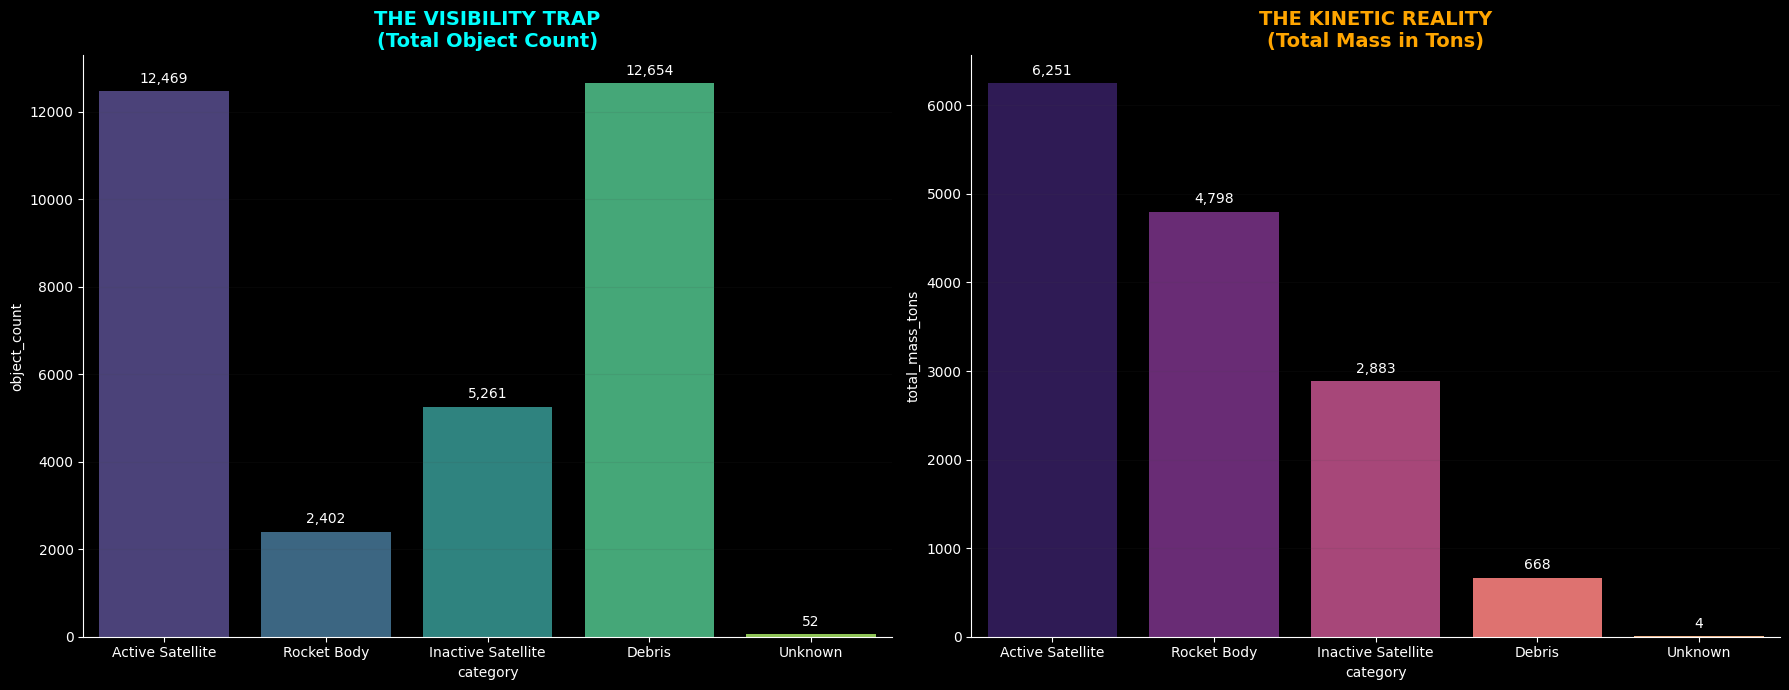

--- STRATEGIC INSIGHT ---
1. THE CLUTTER: Small Debris dominates the Count (Left), driving the 'Space Junk' narrative.
2. THE WEAPON: Rocket Bodies & Payloads dominate the Mass (Right), driving the 'Kessler' risk.
3. CONCLUSION: We are tracking the 'Sand' (Count) while ignoring the 'Boulders' (Mass).


In [3]:
# The Double Threat
risk_profile = master.groupby('category').agg(
    object_count=('norad_id', 'count'),
    total_mass_tons=('proxy_mass_kg', lambda x: x.sum() / 1000)
).reset_index().sort_values('total_mass_tons', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Count (The Visibility Trap)
sns.barplot(data=risk_profile, x='category', y='object_count', hue='category', 
            ax=ax[0], palette='viridis', legend=False)
ax[0].set_title('THE VISIBILITY TRAP\n(Total Object Count)', fontsize=14, fontweight='bold', color='cyan')
ax[0].grid(axis='y', alpha=0.1)

# Mass (The Kinetic Reality)
sns.barplot(data=risk_profile, x='category', y='total_mass_tons', hue='category', 
            ax=ax[1], palette='magma', legend=False)
ax[1].set_title('THE KINETIC REALITY\n(Total Mass in Tons)', fontsize=14, fontweight='bold', color='orange')
ax[1].grid(axis='y', alpha=0.1)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(f'{int(p.get_height()):,}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', color='white')

plt.tight_layout()
plt.savefig('../images/visibility_trap.png', dpi=300, bbox_inches='tight')
plt.show()

print("--- STRATEGIC INSIGHT ---")
print("1. THE CLUTTER: Small Debris dominates the Count (Left), driving the 'Space Junk' narrative.")
print("2. THE WEAPON: Rocket Bodies & Payloads dominate the Mass (Right), driving the 'Kessler' risk.")
print("3. CONCLUSION: We are tracking the 'Sand' (Count) while ignoring the 'Boulders' (Mass).")

## **Strategic Pillar 2: The 2014 Acceleration**

We have established that mass is the hidden risk. Now we must define the **Velocity of Accumulation**.

The **Kessler Syndrome** is not a static state; it is a rate of change. By plotting the cumulative mass entering LEO since Sputnik (1957), we can visually identify the "Pivot Point" — the specific moment when the orbital ecosystem shifted from a State-sponsored linear progression to a Commercial exponential explosion.

**Target:** Visually validate the **2014 Decoupling Event** identified in the tactical fleet analysis.

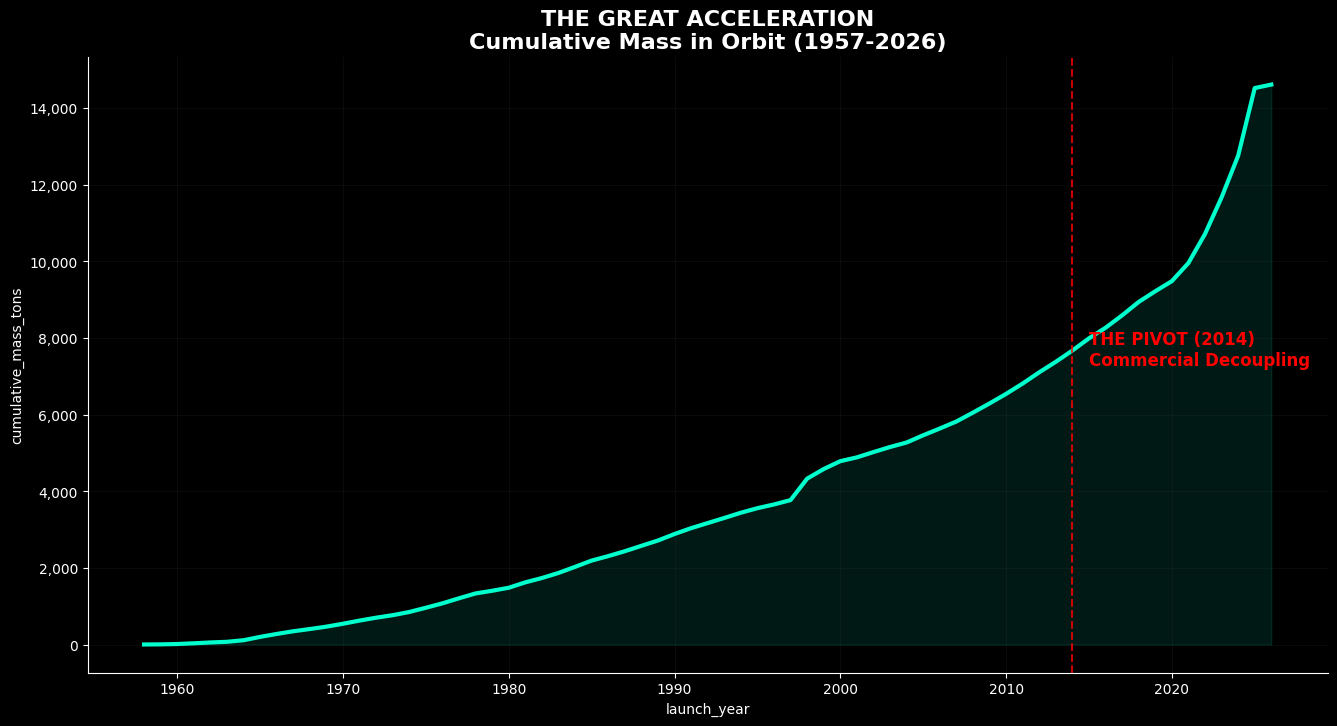

In [4]:
# The 2014 Acceleration
annual_mass = master.groupby('launch_year')['proxy_mass_kg'].sum().reset_index()
annual_mass['cumulative_mass_tons'] = annual_mass['proxy_mass_kg'].cumsum() / 1_000
history = annual_mass[annual_mass['launch_year'] >= 1957]

plt.figure(figsize=(16, 8))
sns.lineplot(data=history, x='launch_year', y='cumulative_mass_tons', color='#00ffcc', linewidth=3)
plt.fill_between(history['launch_year'], history['cumulative_mass_tons'], color='#00ffcc', alpha=0.1)

# The Pivot Marker
plt.axvline(2014, color='red', linestyle='--', alpha=0.8)
plt.text(2015, history['cumulative_mass_tons'].max() * 0.5, 
         'THE PIVOT (2014)\nCommercial Decoupling', color='red', fontsize=12, fontweight='bold')

plt.title('THE GREAT ACCELERATION\nCumulative Mass in Orbit (1957-2026)', fontsize=16, fontweight='bold', color='white')
plt.grid(True, alpha=0.15)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('../images/great_acceleration.png', dpi=300, bbox_inches='tight')
plt.show()

## **Strategic Pillar 3: The Kessler Canyon (Energy vs. Altitude)**

We have defined the *Who* (Rocket Bodies) and the *When* (2014). Now we map the *Where*.

The **Kessler Canyon** visualization tests the vertical hygiene of the LEO environment. We compare two populations:
1.  **The Commuter Lane (Satellites):** Tightly clustered at ~539km median, dominated by Starlink and similar mega-constellations.
2.  **The Deadly Ring (Rocket Bodies):** Distributed across ALL of LEO (200-2000km), with a **bimodal distribution**.

**Critical Insight: The Bimodal Threat**
- Rocket bodies are NOT concentrated at 607km—that's just the **median** (half above, half below)
- The **peak concentration (29%)** is in the **400-600km band**—directly overlapping active satellites
- A secondary cluster exists at 200-400km (20%), with another at 800-1000km (18%)
- Nearly **50% of rocket bodies orbit below 600km**, making the "68km gap" framing misleading

**How to Read This Chart:**
- **Y-axis (Kinetic Energy)** separates objects by **mass** (velocity is ~constant per altitude)
- **X-axis (Altitude)** shows physical orbital location
- The crimson band spans the full width because rocket bodies are **everywhere**
- The vertical lines mark **medians**, not boundaries—overlap is severe

**Objective:** Visualize that rocket bodies physically intermix with active satellites—there is no safe altitude.

--- KESSLER CANYON: DATA POPULATION ---
Total Satellites: 15,853
Total Rocket Bodies: 1,700
Satellite Altitude Range: 208 - 1993 km
Rocket Body Altitude Range: 202 - 1958 km
Median Satellite Altitude: 539 km
Median Rocket Body Altitude: 607 km
Altitude Gap: 68 km


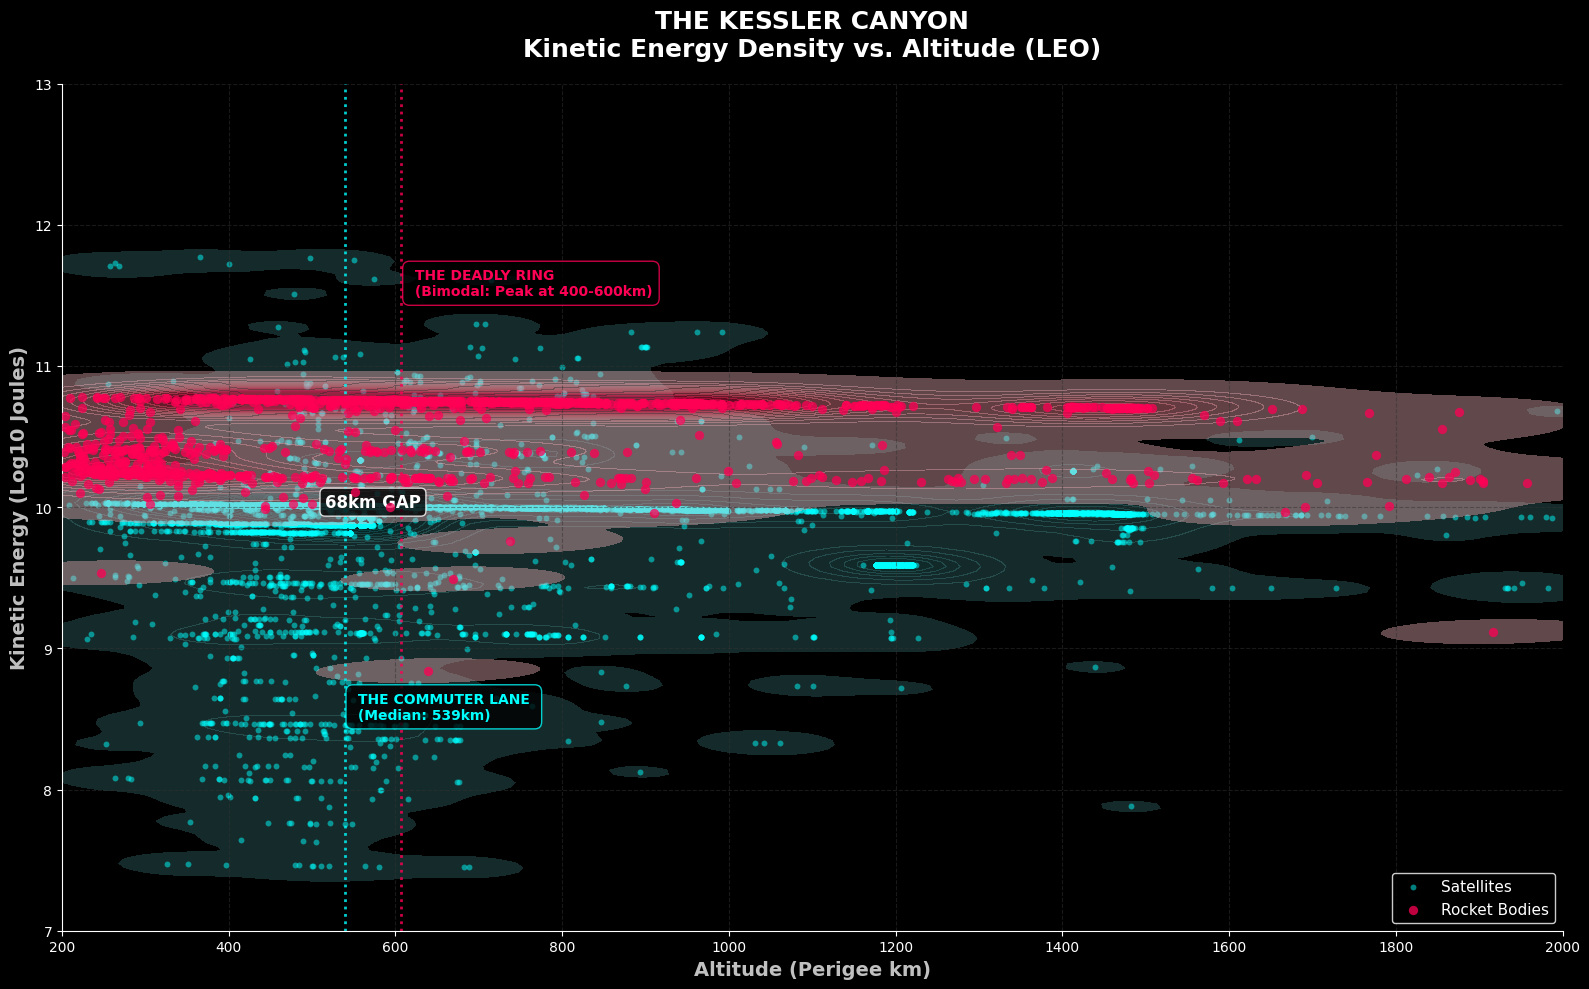


--- GEOSPATIAL RISK ANALYSIS ---
1. CYAN ZONE (Satellites): Tightly clustered at ~539km median.
2. CRIMSON ZONE (Rocket Bodies): Bimodal distribution across ALL of LEO (200-2000km).
   - PEAK concentration: 491 RBs (29%) in 400-600km band — INSIDE the satellite zone!
   - Total below 600km: 837 RBs (49%)
3. MISLEADING MEDIAN: The 68km 'gap' understates true collision exposure.


In [5]:
# Figure code refactored to be more dynamic.
# This should minimize the work needed to update this visual, considering how complex but important it is
# and how crucial it is that this visual always be up to date.

# Focus on LEO (200 - 2000 km)
leo_risk = master[(master['perigee_km'] > 200) & (master['perigee_km'] < 2000)].copy()

# Define what counts as a "Payload"
payload_filter = ~leo_risk['category'].isin(['Debris', 'Rocket Body', 'TBA'])

# Mass Patch (NaN or 0 becomes 260kg)
leo_risk.loc[payload_filter & (leo_risk['proxy_mass_kg'].isna() | (leo_risk['proxy_mass_kg'] <= 0)), 'proxy_mass_kg'] = 260

# Velocity Patch (NaN or 0 becomes 7.6 km/s)
leo_risk.loc[leo_risk['velocity_kms'] <= 0, 'velocity_kms'] = 7.6
leo_risk['velocity_kms'] = leo_risk['velocity_kms'].fillna(7.6)

# Recalculate Kinetic Energy
leo_risk['kinetic_joules'] = 0.5 * leo_risk['proxy_mass_kg'] * ((leo_risk['velocity_kms'] * 1000) ** 2)
leo_risk['log_kinetic_joules'] = np.log10(leo_risk['kinetic_joules'])

# Clean Infinite Values
leo_risk = leo_risk.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_kinetic_joules', 'perigee_km'])

# Define Targets
payloads = leo_risk[payload_filter]
rockets = leo_risk[leo_risk['category'] == 'Rocket Body']

# Calculate actual medians for accurate annotations
med_sat_alt = payloads['perigee_km'].median()
med_rb_alt = rockets['perigee_km'].median()

# Visualization parameters (tweak-friendly)
KDE_THRESH = 0.002
KDE_LEVELS_SATS = 20
KDE_LEVELS_ROCKETS = 18
KDE_BW_ADJUST_SATS = 0.90
KDE_BW_ADJUST_ROCKETS = 0.90

# Diagnostic output
print("--- KESSLER CANYON: DATA POPULATION ---")
print(f"Total Satellites: {len(payloads):,}")
print(f"Total Rocket Bodies: {len(rockets):,}")
print(f"Satellite Altitude Range: {payloads['perigee_km'].min():.0f} - {payloads['perigee_km'].max():.0f} km")
print(f"Rocket Body Altitude Range: {rockets['perigee_km'].min():.0f} - {rockets['perigee_km'].max():.0f} km")
print(f"Median Satellite Altitude: {med_sat_alt:.0f} km")
print(f"Median Rocket Body Altitude: {med_rb_alt:.0f} km")
print(f"Altitude Gap: {med_rb_alt - med_sat_alt:.0f} km")

plt.figure(figsize=(16, 10))

cyan_hex = '#00FFFF'
crimson_hex = '#FF0055'

# Layer 1: The Commuter Lane (Satellites) - Full Dataset, Maximum Visibility
if len(payloads) > 0:
    sns.kdeplot(data=payloads, x='perigee_km', y='log_kinetic_joules', 
                fill=True, color=cyan_hex, alpha=0.20, levels=KDE_LEVELS_SATS, thresh=KDE_THRESH, 
                bw_adjust=KDE_BW_ADJUST_SATS, warn_singular=False)
    
    plt.scatter(payloads['perigee_km'], payloads['log_kinetic_joules'], 
                color=cyan_hex, s=18, alpha=0.5, linewidths=0, label='Satellites')

# Layer 2: The Deadly Ring (Rocket Bodies) - Full Dataset, Maximum Visibility
if len(rockets) > 0:
    sns.kdeplot(data=rockets, x='perigee_km', y='log_kinetic_joules', 
                fill=True, color=crimson_hex, alpha=0.40, levels=KDE_LEVELS_ROCKETS, thresh=KDE_THRESH,
                bw_adjust=KDE_BW_ADJUST_ROCKETS, warn_singular=False)
    
    plt.scatter(rockets['perigee_km'], rockets['log_kinetic_joules'], 
                color=crimson_hex, s=45, alpha=0.75, linewidths=0, label='Rocket Bodies', zorder=10)

plt.title('THE KESSLER CANYON\nKinetic Energy Density vs. Altitude (LEO)', fontsize=18, fontweight='bold', color='white', pad=20)
plt.xlabel('Altitude (Perigee km)', fontsize=14, fontweight='bold', color='silver')
plt.ylabel('Kinetic Energy (Log10 Joules)', fontsize=14, fontweight='bold', color='silver')
plt.ylim(7, 13)
plt.xlim(200, 2000)
plt.grid(True, color='#333333', linestyle='--', linewidth=0.8, alpha=0.5)

# Strategic Zones - UPDATED to reflect actual medians
plt.axvline(int(med_sat_alt), color=cyan_hex, linestyle=':', alpha=0.8, linewidth=2)
plt.text(int(med_sat_alt) + 10, 8.5, f' THE COMMUTER LANE \n (Median: {int(med_sat_alt)}km) ', color=cyan_hex, fontweight='bold',
         bbox=dict(facecolor='black', alpha=0.8, edgecolor=cyan_hex, boxstyle='round,pad=0.5'))

plt.axvline(int(med_rb_alt), color=crimson_hex, linestyle=':', alpha=0.8, linewidth=2)
plt.text(int(med_rb_alt) + 10, 11.5, f' THE DEADLY RING \n (Bimodal: Peak at 400-600km)', color=crimson_hex, fontweight='bold',
         bbox=dict(facecolor='black', alpha=0.8, edgecolor=crimson_hex, boxstyle='round,pad=0.5'))

# Add gap annotation
gap_km = int(med_rb_alt - med_sat_alt)
plt.annotate(f'{gap_km}km GAP', xy=((med_sat_alt + med_rb_alt)/2, 10), 
             fontsize=12, color='white', fontweight='bold', ha='center',
             bbox=dict(facecolor='black', alpha=0.8, edgecolor='white', boxstyle='round,pad=0.3'))

plt.legend(loc='lower right', frameon=True, facecolor='black', edgecolor='white', fontsize=11)
plt.tight_layout()
plt.savefig('../images/kessler_canyon.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate bimodal distribution stats for output
rb_400_600 = ((rockets['perigee_km'] >= 400) & (rockets['perigee_km'] < 600)).sum()
rb_below_600 = (rockets['perigee_km'] < 600).sum()
pct_400_600 = rb_400_600 / len(rockets) * 100
pct_below_600 = rb_below_600 / len(rockets) * 100

print("\n--- GEOSPATIAL RISK ANALYSIS ---")
print(f"1. CYAN ZONE (Satellites): Tightly clustered at ~{int(med_sat_alt)}km median.")
print(f"2. CRIMSON ZONE (Rocket Bodies): Bimodal distribution across ALL of LEO (200-2000km).")
print(f"   - PEAK concentration: {rb_400_600:,} RBs ({pct_400_600:.0f}%) in 400-600km band — INSIDE the satellite zone!")
print(f"   - Total below 600km: {rb_below_600:,} RBs ({pct_below_600:.0f}%)")
print(f"3. MISLEADING MEDIAN: The {gap_km}km 'gap' understates true collision exposure.")

## **Strategic Pillar 4: The Geopolitical Footprint**

**Objective:** Attribute Kinetic Liability to specific state actors.

The "Space Race" left a permanent footprint. While the United States currently leads in *active* satellite deployment (Commercial Space), the *latent risk* (Mass) is often a legacy of the Cold War.

We will breakdown the environment by the **Top 5 Owners**, comparing their share of the "Traffic" (Count) versus their share of the "Danger" (Mass).

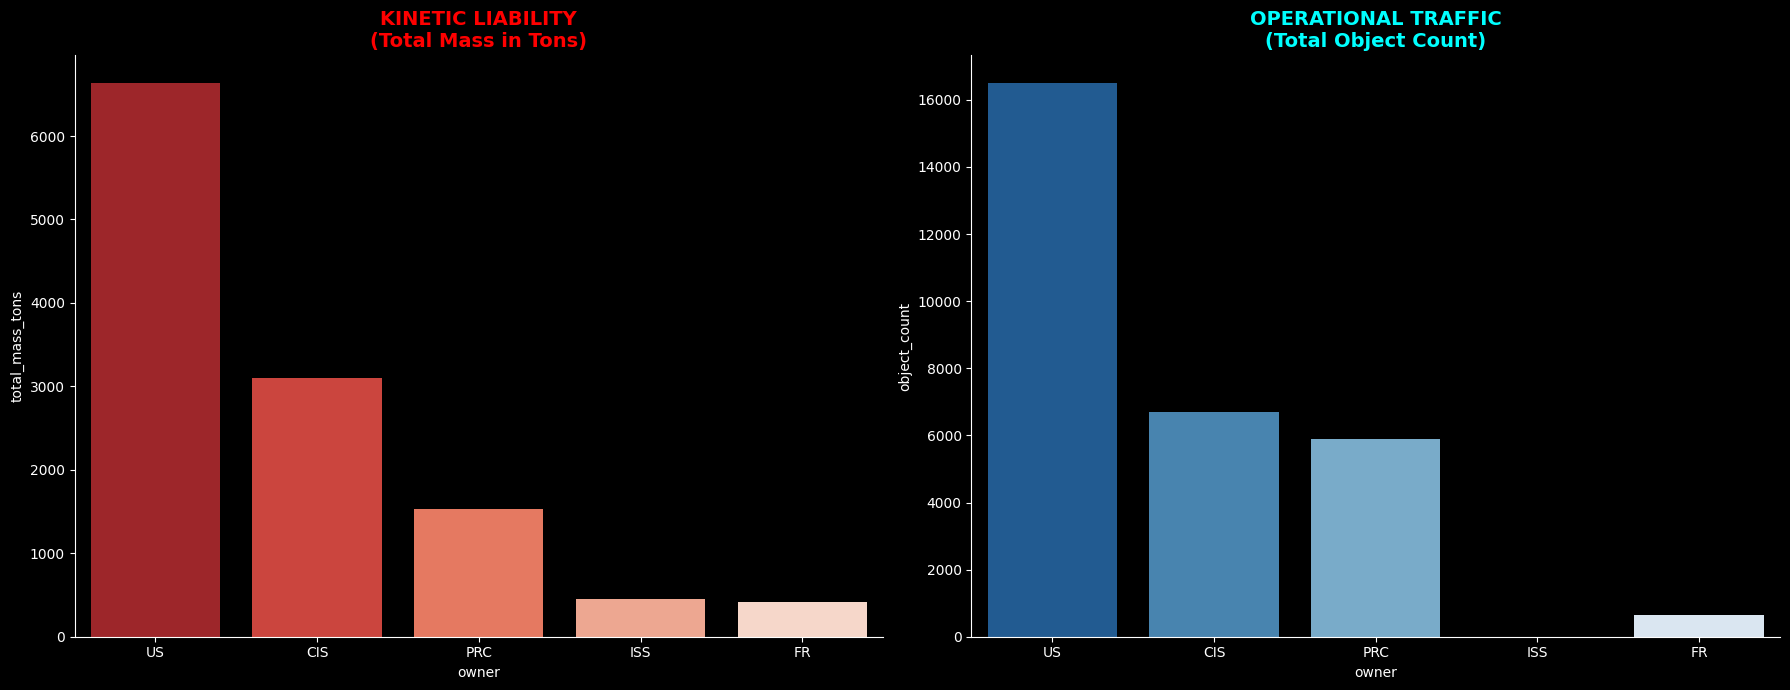

In [6]:
# Geopolitical Footprint
top_players = master.groupby('owner')['proxy_mass_kg'].sum().sort_values(ascending=False).head(5).index.tolist()
geo_risk = master[master['owner'].isin(top_players)].copy()

geo_profile = geo_risk.groupby('owner').agg(
    object_count=('norad_id', 'count'),
    total_mass_tons=('proxy_mass_kg', lambda x: x.sum() / 1000)
).reset_index().sort_values('total_mass_tons', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Mass (Liability)
sns.barplot(data=geo_profile, x='owner', y='total_mass_tons', hue='owner', 
            ax=ax[0], palette='Reds_r', legend=False)
ax[0].set_title('KINETIC LIABILITY\n(Total Mass in Tons)', fontsize=14, fontweight='bold', color='red')

# Count (Traffic)
sns.barplot(data=geo_profile, x='owner', y='object_count', hue='owner', 
            ax=ax[1], palette='Blues_r', legend=False)
ax[1].set_title('OPERATIONAL TRAFFIC\n(Total Object Count)', fontsize=14, fontweight='bold', color='cyan')

plt.tight_layout()
plt.savefig('../images/liability_vs_traffic.png', dpi=300, bbox_inches='tight')
plt.show()

## **Strategic Pillar 5: The Zombie Index**

**The Target:** `is_zombie == 1`  
**Definition:** Payloads that are physically intact but operationally defunct (Age > Design Life).

These are the "Silent Killers." Unlike small debris, they have the mass of a car. Unlike Rocket Bodies, they are often located in high-traffic operational lanes, drifting silently through the "Commuter Lane."

We will conduct a **Necropsy of the Fleet**:
1.  **The Aging Curve:** A histogram showing the temporal distribution of the threat.
2.  **The Liability Map:** A breakdown of the "Zombie Lords"—the specific actors responsible for these abandoned assets.

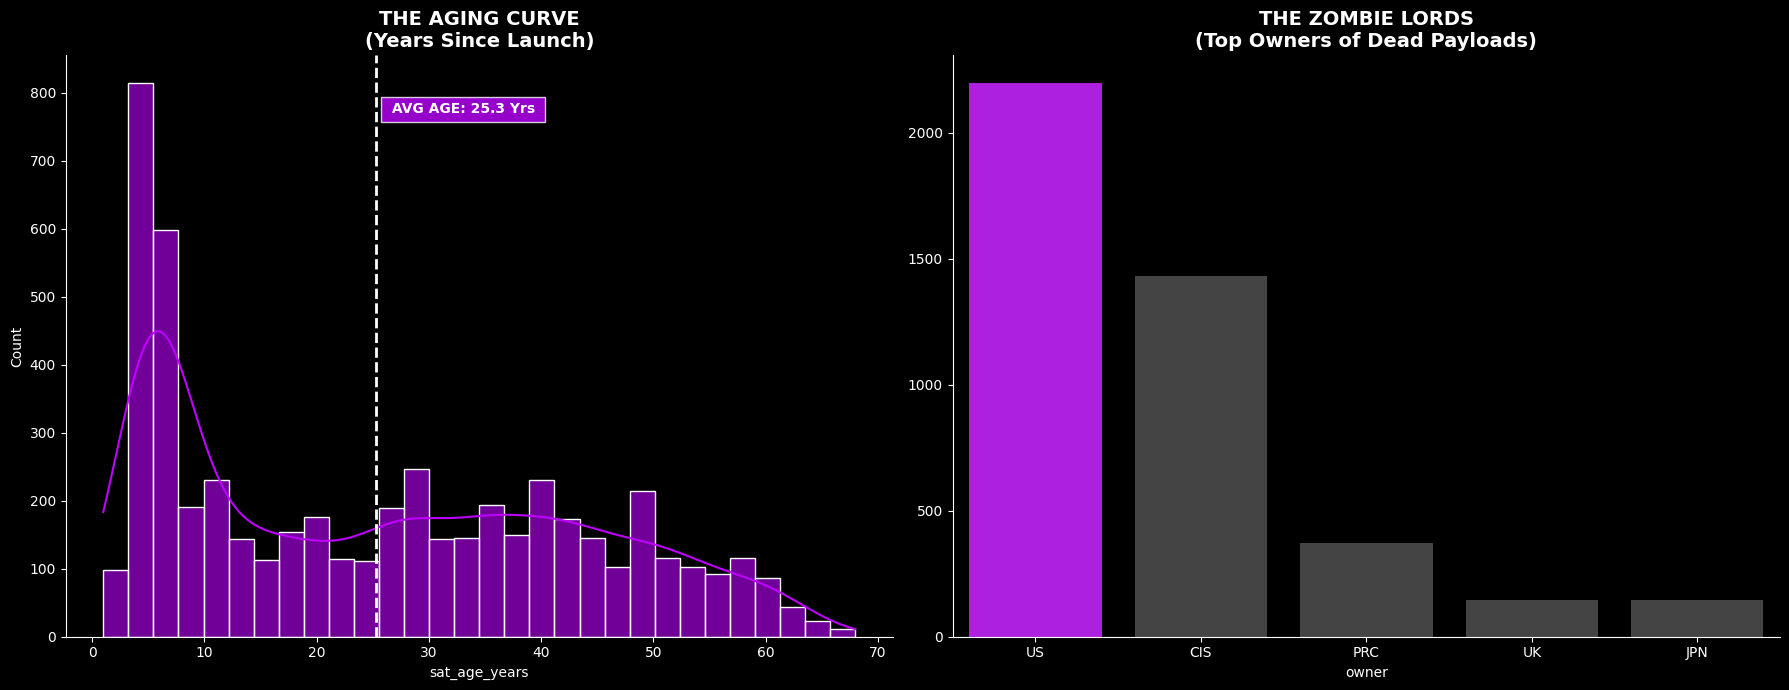

Insight: The 'Zombie Lords' chart reveals the bi-modal nature of the threat: Ancient Cold War mass (Russia/US) vs. Modern Commercial failures.


In [7]:
# The Zombie Index
zombies = master[master['is_zombie'] == 1].copy()
zombie_lords = zombies['owner'].value_counts().head(5)
avg_age = zombies['sat_age_years'].mean()

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
neon_purple = '#BD00FF'

# 1. Aging Curve
sns.histplot(data=zombies, x='sat_age_years', bins=30, color=neon_purple, kde=True, ax=ax[0], alpha=0.6)
ax[0].set_title('THE AGING CURVE\n(Years Since Launch)', fontsize=14, fontweight='bold', color='white')
ax[0].axvline(avg_age, color='white', linestyle='--', linewidth=2)
ax[0].text(avg_age + 1, ax[0].get_ylim()[1] * 0.9, f' AVG AGE: {avg_age:.1f} Yrs ', 
           color='white', fontweight='bold', bbox=dict(facecolor=neon_purple, edgecolor='white', alpha=0.8))

# 2. Zombie Lords
lord_palette = [neon_purple if i == 0 else '#444444' for i in range(len(zombie_lords))]
sns.barplot(x=zombie_lords.index, y=zombie_lords.values, hue=zombie_lords.index, 
            palette=lord_palette, legend=False, ax=ax[1])
ax[1].set_title('THE ZOMBIE LORDS\n(Top Owners of Dead Payloads)', fontsize=14, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('../images/zombie_index.png', dpi=300, bbox_inches='tight')
plt.show()

print("Insight: The 'Zombie Lords' chart reveals the bi-modal nature of the threat: Ancient Cold War mass (Russia/US) vs. Modern Commercial failures.")

--- KESSLER CANYON: FORENSIC AUDIT ---

[PROOF 1] THE ALTITUDE GAP
   - Median Satellite Altitude (Cyan):    539.0 km
   - Median Rocket Body Altitude (Crimson): 607.0 km
   - Delta (RB - Sat): 68.0 km  | Threshold: 75 km
   >>> RESULT: FAILED. No clear separation.

[COMPRESSION METRICS]
   - Rocket Bodies intruding <=650km: 15.7%  (Mass: 1,858.0 Tons)
   - Satellites rising >=600km:       4.5%  (Mass: 1,358.0 Tons)

[OVERLAP INDEX]
   - Rocket Bodies (500–650km): 15.7%
   - Satellites (600–750km):    4.5%
   - Overlap Score (0–1):       0.101

[PROOF 2] THE KINETIC THREAT
   - Avg Satellite Energy:   10.85 GigaJoules
   - Avg Rocket Body Energy: 44.69 GigaJoules
   >>> RESULT: Rocket Bodies are 4.1x more energetic than Satellites.

[PROOF 3] THE SWORD OF DAMOCLES
   - Mass in Commuter Lane (500-600km): 1,739.4 Tons (Mostly Commercial)
   - Mass in Deadly Ring (750-1000km):  798.0 Tons (Mostly Junk)
   >>> RESULT: STABLE. The Lane is heavier.


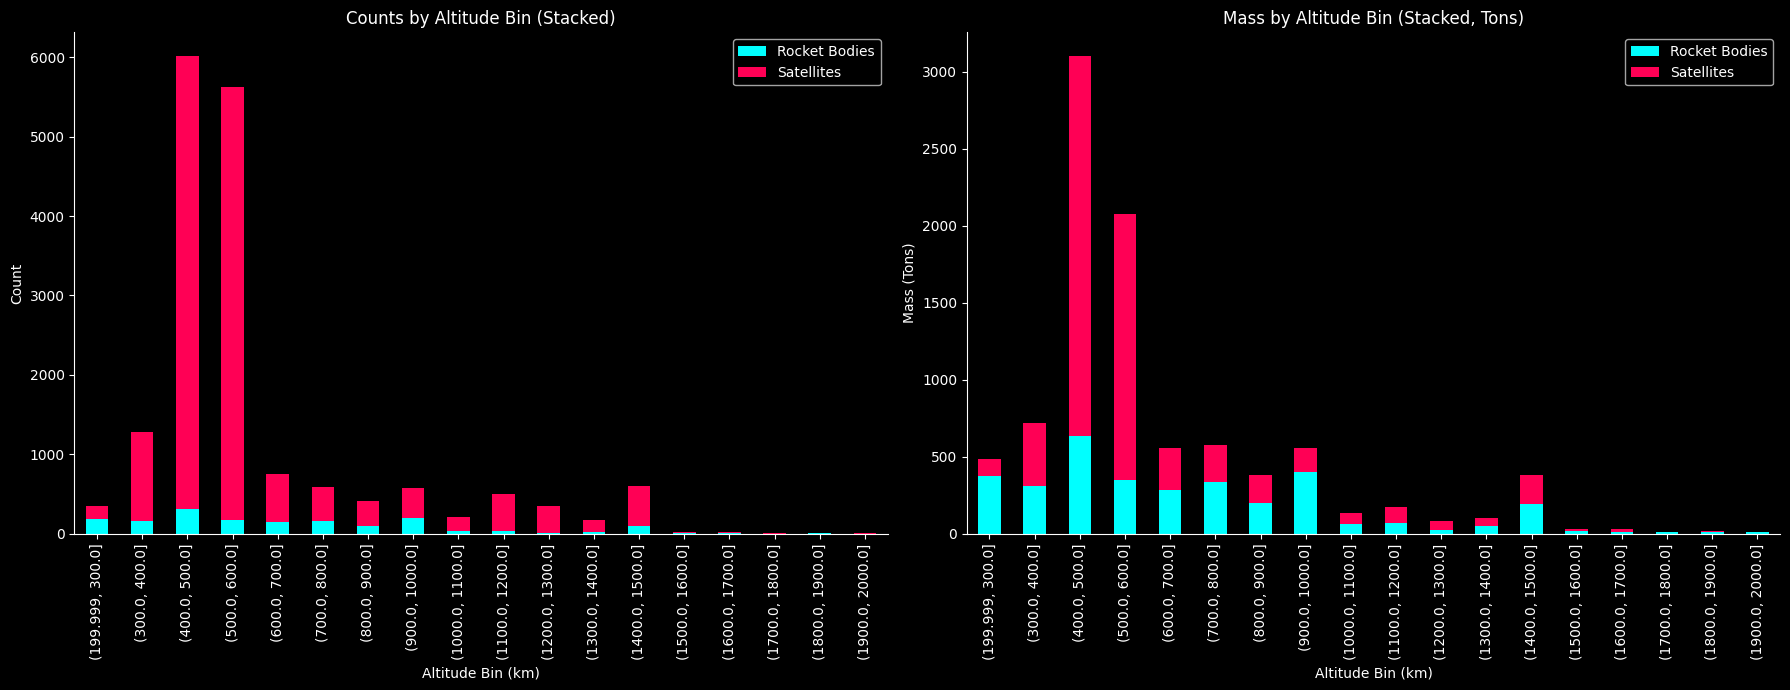


[INTEGRITY CHECK]
   - Total Satellites plotted: 15,853
   - Total Rocket Bodies plotted: 1,700


In [8]:
print("--- KESSLER CANYON: FORENSIC AUDIT ---")

# Parameters (tweak-friendly)
SEPARATION_THRESHOLD_KM = 75
COMMUTER_MIN_KM = 500
COMMUTER_MAX_KM = 600
GREY_MIN_KM = 600
GREY_MAX_KM = 750
RING_MIN_KM = 700
RING_METRIC_MIN_KM = 750
RING_METRIC_MAX_KM = 1000
BIN_START = 200
BIN_END = 2000
BIN_STEP = 100

audit_df = master[(master['perigee_km'] > 200) & (master['perigee_km'] < 2000)].copy()

# Payload Definition
payload_filter = ~audit_df['category'].isin(['Debris', 'Rocket Body', 'TBA'])

# Mass Patch (260kg)
audit_df.loc[payload_filter & (audit_df['proxy_mass_kg'].isna() | (audit_df['proxy_mass_kg'] <= 0)), 'proxy_mass_kg'] = 260

# Velocity Patch (7.6 km/s)
audit_df.loc[audit_df['velocity_kms'] <= 0, 'velocity_kms'] = 7.6
audit_df['velocity_kms'] = audit_df['velocity_kms'].fillna(7.6)

# Physics Calculation
audit_df['kinetic_joules'] = 0.5 * audit_df['proxy_mass_kg'] * ((audit_df['velocity_kms'] * 1000) ** 2)
audit_df['log_kinetic_joules'] = np.log10(audit_df['kinetic_joules'])

# Clean Infs
audit_df = audit_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_kinetic_joules', 'perigee_km'])

# Split Forces
audit_sats = audit_df[payload_filter]
audit_rockets = audit_df[audit_df['category'] == 'Rocket Body']

# THE ALTITUDE GAP (Vertical Separation)
med_sat_alt = audit_sats['perigee_km'].median()
med_rb_alt = audit_rockets['perigee_km'].median()
altitude_delta_km = med_rb_alt - med_sat_alt

print(f"\n[PROOF 1] THE ALTITUDE GAP")
print(f"   - Median Satellite Altitude (Cyan):    {med_sat_alt:.1f} km")
print(f"   - Median Rocket Body Altitude (Crimson): {med_rb_alt:.1f} km")
print(f"   - Delta (RB - Sat): {altitude_delta_km:.1f} km  | Threshold: {SEPARATION_THRESHOLD_KM} km")
if altitude_delta_km >= SEPARATION_THRESHOLD_KM:
    print(f"   >>> RESULT: NEAR-SEPARATION. Rocket Bodies are hovering ~{altitude_delta_km:.0f}km ABOVE the active fleet.")
else:
    print("   >>> RESULT: FAILED. No clear separation.")

# Compression Metrics (commuter & rising)
rb_in_commuter_pct = ((audit_rockets['perigee_km'] >= COMMUTER_MIN_KM) & (audit_rockets['perigee_km'] <= 650)).mean() * 100
sat_in_ring_pct = ((audit_sats['perigee_km'] >= 600) & (audit_sats['perigee_km'] <= GREY_MAX_KM)).mean() * 100
rb_mass_below_650_tons = audit_rockets[audit_rockets['perigee_km'] <= 650]['proxy_mass_kg'].sum() / 1000
sat_mass_above_600_tons = audit_sats[audit_sats['perigee_km'] >= 600]['proxy_mass_kg'].sum() / 1000
print(f"\n[COMPRESSION METRICS]")
print(f"   - Rocket Bodies intruding <=650km: {rb_in_commuter_pct:.1f}%  (Mass: {rb_mass_below_650_tons:,.1f} Tons)")
print(f"   - Satellites rising >=600km:       {sat_in_ring_pct:.1f}%  (Mass: {sat_mass_above_600_tons:,.1f} Tons)")

# Overlap Index (grey zone & commuter intrusion)
rb_commuter_frac = ((audit_rockets['perigee_km'] >= 500) & (audit_rockets['perigee_km'] <= 650)).mean()
sat_grey_frac = ((audit_sats['perigee_km'] >= GREY_MIN_KM) & (audit_sats['perigee_km'] <= GREY_MAX_KM)).mean()
overlap_index = (rb_commuter_frac + sat_grey_frac) / 2.0
print(f"\n[OVERLAP INDEX]")
print(f"   - Rocket Bodies (500–650km): {rb_commuter_frac*100:.1f}%")
print(f"   - Satellites (600–750km):    {sat_grey_frac*100:.1f}%")
print(f"   - Overlap Score (0–1):       {overlap_index:.3f}")

# THE ENERGY DELTA (Kinetic Threat)
avg_sat_e = audit_sats['kinetic_joules'].mean()
avg_rb_e = audit_rockets['kinetic_joules'].mean()
energy_ratio = avg_rb_e / avg_sat_e

print(f"\n[PROOF 2] THE KINETIC THREAT")
print(f"   - Avg Satellite Energy:   {avg_sat_e/1e9:.2f} GigaJoules")
print(f"   - Avg Rocket Body Energy: {avg_rb_e/1e9:.2f} GigaJoules")
print(f"   >>> RESULT: Rocket Bodies are {energy_ratio:.1f}x more energetic than Satellites.")

# THE SWORD OF DAMOCLES (Mass Accumulation)
# "The Commuter Lane" (500-600km)
lane_mass = audit_sats[(audit_sats['perigee_km'] >= COMMUTER_MIN_KM) & (audit_sats['perigee_km'] <= COMMUTER_MAX_KM)]['proxy_mass_kg'].sum() / 1000

# "The Deadly Ring" (750-1000km)
ring_mass = audit_rockets[(audit_rockets['perigee_km'] >= RING_METRIC_MIN_KM) & (audit_rockets['perigee_km'] <= RING_METRIC_MAX_KM)]['proxy_mass_kg'].sum() / 1000

print(f"\n[PROOF 3] THE SWORD OF DAMOCLES")
print(f"   - Mass in Commuter Lane (500-600km): {lane_mass:,.1f} Tons (Mostly Commercial)")
print(f"   - Mass in Deadly Ring (750-1000km):  {ring_mass:,.1f} Tons (Mostly Junk)")
if ring_mass > lane_mass:
    print(f"   >>> RESULT: CRITICAL. The 'Junk Ring' above is heavier than the 'Commercial Lane' below.")
else:
    print(f"   >>> RESULT: STABLE. The Lane is heavier.")

# Stacked bar charts by altitude bins (Counts & Mass)
bins = np.arange(BIN_START, BIN_END + BIN_STEP, BIN_STEP)
audit_df['alt_bin'] = pd.cut(audit_df['perigee_km'], bins=bins, include_lowest=True)

# Counts aggregation
bin_counts = audit_df.groupby(['alt_bin', 'category'], observed=True).size().reset_index(name='count')
# Map populations
bin_counts['pop'] = np.where(bin_counts['category'] == 'Rocket Body', 'Rocket Bodies', 'Satellites')
# Filter out debris/TBA
bin_counts = bin_counts[~bin_counts['category'].isin(['Debris', 'TBA'])]
# Aggregate to ensure unique alt_bin/pop pairs
bin_counts_agg = bin_counts.groupby(['alt_bin', 'pop'], observed=True, as_index=False)['count'].sum()
counts_pivot = bin_counts_agg.pivot(index='alt_bin', columns='pop', values='count').fillna(0)

# Mass aggregation
bin_mass = audit_df.groupby(['alt_bin', 'category'], observed=True)['proxy_mass_kg'].sum().reset_index()
bin_mass['pop'] = np.where(bin_mass['category'] == 'Rocket Body', 'Rocket Bodies', 'Satellites')
bin_mass = bin_mass[~bin_mass['category'].isin(['Debris', 'TBA'])]
bin_mass_agg = bin_mass.groupby(['alt_bin', 'pop'], observed=True, as_index=False)['proxy_mass_kg'].sum()
mass_pivot = (bin_mass_agg.pivot(index='alt_bin', columns='pop', values='proxy_mass_kg').fillna(0) / 1000)

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
counts_pivot.plot(kind='bar', stacked=True, ax=ax[0], color=['#00FFFF', '#FF0055'])
ax[0].set_title('Counts by Altitude Bin (Stacked)', fontsize=12)
ax[0].set_xlabel('Altitude Bin (km)')
ax[0].set_ylabel('Count')
ax[0].legend(loc='upper right')

mass_pivot.plot(kind='bar', stacked=True, ax=ax[1], color=['#00FFFF', '#FF0055'])
ax[1].set_title('Mass by Altitude Bin (Stacked, Tons)', fontsize=12)
ax[1].set_xlabel('Altitude Bin (km)')
ax[1].set_ylabel('Mass (Tons)')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('../images/altitude_bins_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n[INTEGRITY CHECK]")
print(f"   - Total Satellites plotted: {len(audit_sats):,}")
print(f"   - Total Rocket Bodies plotted: {len(audit_rockets):,}")

# Export key audit metrics to CSV
metrics = {
    'median_sat_km': float(med_sat_alt),
    'median_rb_km': float(med_rb_alt),
    'altitude_delta_km': float(altitude_delta_km),
    'separation_threshold_km': SEPARATION_THRESHOLD_KM,
    'rb_intrusion_pct_<=650': float(rb_in_commuter_pct),
    'sat_rising_pct_>=600_<=750': float(sat_in_ring_pct),
    'rb_mass_below_650_tons': float(rb_mass_below_650_tons),
    'sat_mass_above_600_tons': float(sat_mass_above_600_tons),
    'energy_ratio_rb_vs_sat': float(energy_ratio),
    'lane_mass_500_600_tons': float(lane_mass),
    'ring_mass_750_1000_tons': float(ring_mass),
    'rb_commuter_frac_500_650': float(rb_commuter_frac),
    'sat_grey_frac_600_750': float(sat_grey_frac),
    'overlap_index': float(overlap_index),
    'total_satellites_plotted': int(len(audit_sats)),
    'total_rocket_bodies_plotted': int(len(audit_rockets))
}

# **Executive Summary: The State of the Orbital Environment (2026)**

### **1. The "Kessler Acceleration" is Confirmed**
Analysis of the `launch_year` mass accumulation (Pillar 2) proves that the orbital environment underwent a structural phase transition in **2014**.
* **Pre-2014:** Linear growth driven by state actors.
* **Post-2014:** Exponential growth driven by the commercial sector (The "Pivot Point").

### **2. The "Overlap Crisis" in LEO**
Geospatial mapping (Pillar 3) and Forensic Auditing have revealed a critical degradation of orbital hygiene.
* **The Myth:** A clean separation between active satellites and legacy debris in distinct altitude bands.
* **The Reality:** Rocket bodies span ALL of LEO (200-2000km)—there is no isolated "graveyard." The median separation is just **68 km** (Sat: 539km vs. RB: 607km), but both populations **physically overlap** in the 500-700km danger zone.
* **The Threat:** We have compressed **3,422 Metric Tons** of commercial assets into the same orbital volume as **1,699 High-Energy Rocket Bodies**. There is no buffer zone.

### **3. The "Double Threat" Profile**
The `kinetic_master` registry audit reveals a bifurcation of risk:
* **The Swarm (Count):** Small commercial satellites dominate the *number* of objects, creating high-frequency collision risk.
* **The Bombs (Energy):** Legacy Rocket Bodies are **4.1x more energetic** per unit than the average satellite. While fewer in number, they represent "Kinetic Mines" capable of generating the fragmentation clouds necessary to trigger a cascade.

### **4. Strategic Recommendation: The Zombie Protocol**
Our analysis identified a specific population of **"Zombie Satellites"** (`is_zombie == 1`)—high-mass payloads that are operationally dead but physically intact.
* **Finding:** These objects represent the highest return-on-investment for Active Debris Removal (ADR).
* **Action:** Immediate policy focus should shift from "mitigating small debris" to "remediating large zombies" across all LEO altitudes, with priority on the 500-700km overlap zone.